In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import UnivariateSpline

In [4]:
#Esercizio 1

In [5]:
tau = 3.052*60
steps = 1000
th0=1000

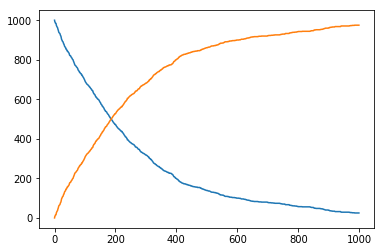

In [6]:
#first way
thCount = np.zeros(steps)
thCount[0] = th0
stopTime = steps
p_decay = 1 - 2**(-1/tau)
for i in range(1,steps):
    if thCount[i-1] == 0:
        stopTime = i-1
        break
    mask = np.random.rand(int(thCount[i-1])) <= p_decay
    thCount[i]=thCount[i-1]-len(mask[mask])
plt.plot(thCount[0:stopTime],label='Thelllium atoms')
plt.plot(th0-thCount[0:stopTime],label='Lead atoms')
plt.show()

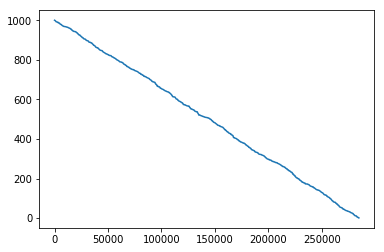

In [7]:
#second way
steps = 1000
d_times = np.zeros(steps)
d_times[0]=0
for i in range(1,steps):
    d_times[i]=d_times[i-1]-(tau/np.log(2))*np.log(np.random.rand())
N_t = np.arange(th0,th0-steps,-1)
plt.plot(d_times,N_t)
plt.show()

In [8]:
#Esercizio 2

In [9]:
q_e = 1.60218E-19 #Coulombs
Z = 79
e0 = 8.854187817E-12
E = 7.7*(q_e*1E6)
a0 = 0.5292E-10
sigma = a0/100
beam = np.random.randn(2,1000000)*sigma
factor = (Z*q_e*q_e)/(2*np.pi*e0*E)
b = np.sqrt(beam[0,:]**2+beam[1,:]**2) #fix this one
angles = 2*np.arctan(factor/b)
angles = np.sort(angles[angles>np.pi/2])
#cprob = (np.arange(len(angles), dtype=float)+1)/(len(angles)+1)
#icdf = UnivariateSpline(x=cprob, y=angles)
#probs = np.arange(0,1, 1e-2)
#plt.figure()
#plt.plot(icdf(probs),probs, color='r', label='Cumulative')
#plt.legend()
#plt.show()

In [10]:
#Esercizio 3

In [11]:
f = lambda x:  (np.sin(1/(x*(2-x))))**2

In [13]:
nSamples = 1000000
a = 0.0
b = 2.0
x = np.random.rand(nSamples)*(b-a)+a
f_x = f(x)
min_f = np.min(f_x)
max_f = np.max(f_x)
print(min_f)
print(max_f)
y = np.random.rand(nSamples)*(max_f-min_f)+min_f
hits = f_x[y < f_x]
print(2*len(hits)/nSamples)
#estimate the error?

1.2452553497515647e-11
0.9999999999993969
1.45157


In [14]:
#Esercizio 4

In [39]:
insideSphere = lambda x : np.linalg.norm(x,axis=0) <= 1

In [40]:
d=9
nSamples = 500000

pts = np.random.rand(d,nSamples)
hit = len(pts[0,:][insideSphere(pts)])
print(hit*2**d/nSamples)

3.247104
